In [15]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [16]:
# encodes Credit_Score variables into numerical values using a mapping dictionary.
def custom_encoding(y):
    mapping = {"Standard":1,"Good":2,"Poor":0,"Bad":0,'NM':0,"No":1,"Yes":2}
    y = y.map(mapping)
    return y

In [ ]:
df = pd.read_csv('credit_score_clean_extraction.csv') # read csv file
# use os to store csv file
features = ['Credit_Mix', 'Total_Financial_Obligations', 'Outstanding_Debt', 'Credit_History_Age', 'Interest_Loan_Interaction']
y = custom_encoding(df["Credit_Score"]) # encode Credit_Score variables into numerical values using a mapping dictionary.


 The `out_liar` function detects and removes outliers from a given column of data. It calculates the first and third quartiles, interquartile range, and upper and lower bounds for outliers. It then counts the number of outliers in the column and replaces them with the appropriate bound value. The function then returns the cleaned column data.

In [18]:
def out_liar(column_data):
    Q1 = column_data.quantile(0.25) # first quartile
    Q3 = column_data.quantile(0.75) # third quartile
    IQR = Q3 - Q1 # interquartile range
    lowerBand = Q1 - 1.5 * IQR # lower band
    upperBand = Q3 + 1.5 * IQR # upper band
    # number of outlier in column
    count_outliar = column_data[column_data > upperBand].count() + column_data[column_data < lowerBand].count() # number of outlier
    if count_outliar > 0:
        color = '#6CE5E8' # color of boxplot
        sns.boxplot(column_data, orient='v', color=color) # boxplot
        plt.title(column_data.name) # title of boxplot
        # show number of outlier
        plt.text(0.8, 0.9, f"outliar:{count_outliar}", fontsize=12, transform=plt.gca().transAxes) # show number of outlier
        plt.show() # show boxplot
        column_data = column_data.apply(lambda x: upperBand if x > upperBand else lowerBand if x < lowerBand else x)
        plt.title(column_data.name) # title of boxplot
        sns.boxplot(column_data, orient='v', color=color) # boxplot after remove outlier
        plt.show() # show boxplot after remove outlier
    return column_data

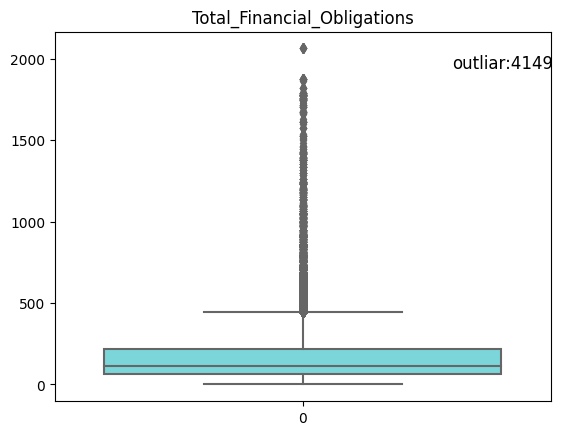

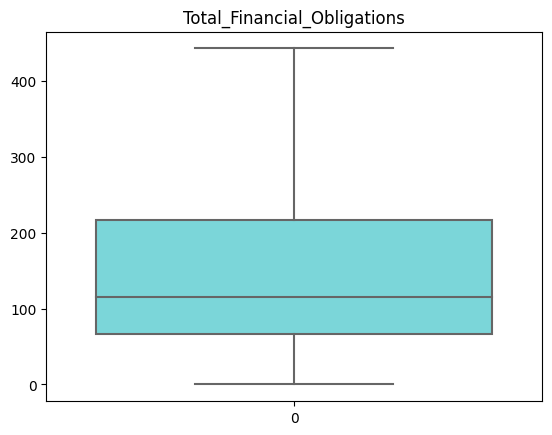

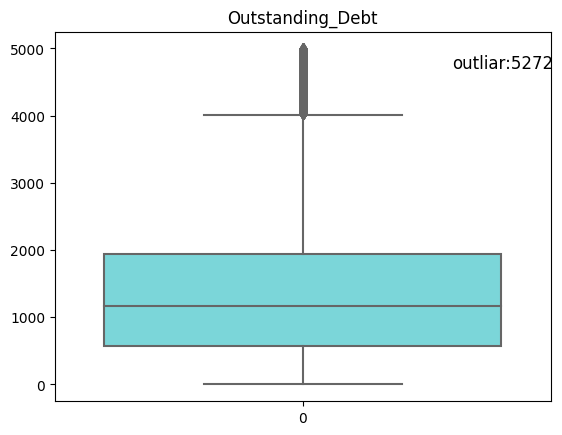

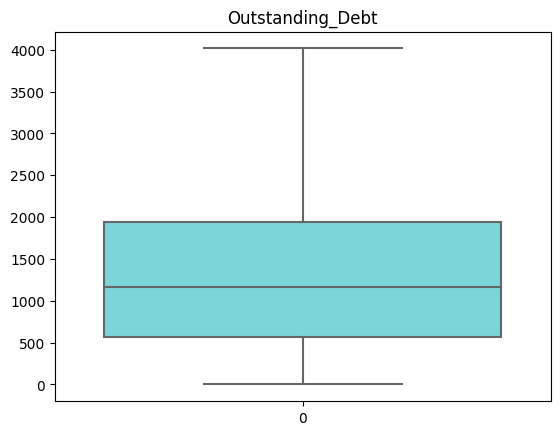

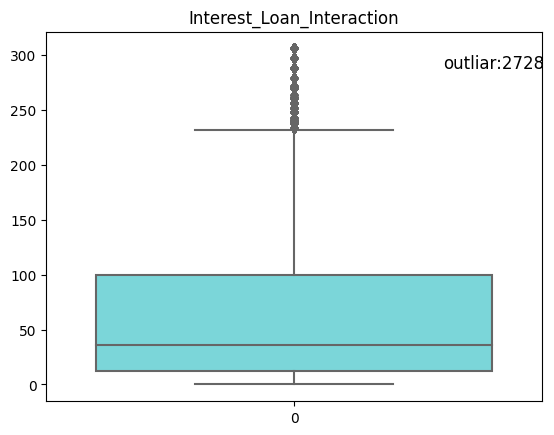

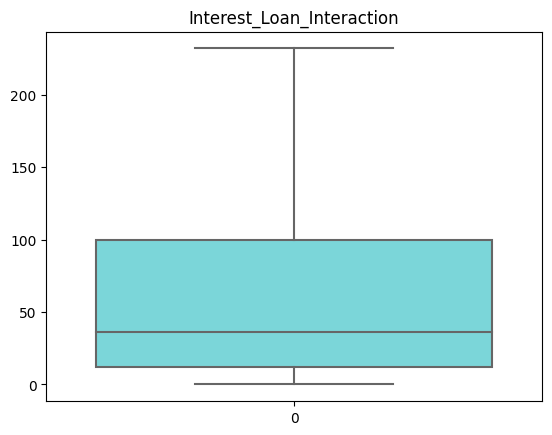

In [19]:
for feature in features:
    df[feature] = out_liar(df[feature])
    


In [20]:
x = df[features] # features
scaler = StandardScaler() # Scale features
scaled_data = scaler.fit_transform(x) # fit and transform features

In [21]:
# save scaled data
scaled_data = pd.DataFrame(scaled_data, columns=features) # convert scaled data to dataframe
scaled_data['Credit_Score'] = y # add Credit_Score column to scaled data
scaled_data.to_csv('../csv/scaled_data.csv', index=False) # save scaled data to csv file
